# python第十二次作业

关于ENSO的计算

## 前期处理

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 防止无法显示中文并设置黑体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
# 读取文件
ds = xr.open_dataset(r'E:\Work\Python\test9\sst.mnmean.nc')['sst']
ds

<xarray.DataArray 'sst' (time: 2016, lat: 89, lon: 180)>
[32296320 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [4]:
def drawmap():
    proj = ccrs.PlateCarree(central_longitude=180)
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})
    # 海岸线
    ax.coastlines('110m')
    # 标注坐标轴
    majorticks = MultipleLocator(30)
    ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, 
                 linestyle=':', auto_inline=False, rotate_labels=False, xlocs=majorticks)
    return ax, fig

In [5]:
def drawpaper():  # 设置坐标轴样式，画图基本设置
    fig = plt.figure(figsize=(9, 6))
    ax = fig.subplots(1, 1)
    ax.set_xlabel('时间/Time')
    ax.set_ylabel('温度/Tmeperature')
    return ax, fig

## 画图第一部分，计算2020年冬季平均

In [6]:
winter = ds.loc[np.datetime64('2020-12-01'):np.datetime64('2021-02-01'), :, :]
winter = winter.mean(dim='time')
winter

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

In [7]:
lonw = winter['lon'].data
latw = winter['lat'].data
print(winter.max(), winter.min())

<xarray.DataArray 'sst' ()>
array(31.01062965) <xarray.DataArray 'sst' ()>
array(-1.79999983)


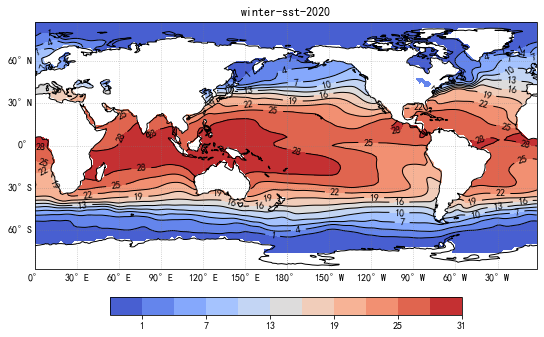

In [8]:
ax1, fig1 = drawmap()
line = ax1.contour(lonw, latw, winter, levels=np.arange(-2, 33, 3), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax1.clabel(line, inline=True, fontsize=10, fmt='%.0f')
shaded = ax1.contourf(lonw, latw, winter, levels=np.arange(-2, 33, 3), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig1.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax1.set_title('winter-sst-2020')
plt.show()

## 画图第二部分

In [9]:
# 168年平均二维
enso_ave = ds.loc[:, 6: -6, 170:240]
lone = enso_ave['lon'].data
late = enso_ave['lat'].data
# print(enso_winter.max(), enso_winter.min())
enso_ave = enso_ave.mean(dim='time')
enso_ave

<xarray.DataArray 'sst' (lat: 7, lon: 36)>
array([[28.6908  , 28.644852, 28.616627, 28.572762, 28.529818, 28.488285,
        28.409763, 28.34217 , 28.267328, 28.194818, 28.138844, 28.074617,
        28.014011, 27.947496, 27.873951, 27.790243, 27.709682, 27.630514,
        27.559107, 27.501072, 27.458723, 27.412916, 27.362535, 27.298534,
        27.25358 , 27.203392, 27.182516, 27.190428, 27.187027, 27.166407,
        27.15126 , 27.157974, 27.164127, 27.157269, 27.14612 , 27.1546  ],
       [28.746569, 28.697073, 28.664232, 28.633762, 28.582489, 28.512606,
        28.416803, 28.324062, 28.223135, 28.122858, 28.032581, 27.937654,
        27.841774, 27.738693, 27.62897 , 27.527365, 27.431957, 27.344318,
        27.255388, 27.183994, 27.128544, 27.079508, 27.019793, 26.934244,
        26.866938, 26.8034  , 26.771843, 26.75082 , 26.723036, 26.684036,
        26.639212, 26.615454, 26.587204, 26.540985, 26.50102 , 26.482752],
       [28.658089, 28.609947, 28.575262, 28.538748, 28.473223, 28.365791,
        28.262766, 28.143856, 28.024315, 27.90247 , 27.777252, 27.649364,
        27.523739, 27.388798, 27.253529, 27.12582 , 27.026049, 26.938402,
        26.844206, 26.751152, 26.653795, 26.578777, 26.496553, 26.394827,
        26.295895, 26.204576, 26.13076 , 26.055838, 25.9797  , 25.908197,
        25.835905, 25.7827  , 25.717527, 25.634035, 25.55736 , 25.508848],
       [28.67584 , 28.618544, 28.582367, 28.53822 , 28.477877, 28.360952,
        28.234219, 28.113768, 27.981268, 27.843624, 27.70552 , 27.569685,
...
        25.305721, 25.200617, 25.094599, 24.981009, 24.874008, 24.796223],
       [28.893383, 28.84428 , 28.810144, 28.783716, 28.717505, 28.625072,
        28.500185, 28.376734, 28.2528  , 28.1295  , 28.007069, 27.884857,
        27.757502, 27.63094 , 27.493279, 27.37325 , 27.27107 , 27.178486,
        27.08166 , 26.959461, 26.835659, 26.71464 , 26.588213, 26.456654,
        26.32812 , 26.192972, 26.051868, 25.907492, 25.769192, 25.624773,
        25.483427, 25.338507, 25.208576, 25.081919, 24.9725  , 24.873886],
       [29.129648, 29.104513, 29.087545, 29.06192 , 29.01883 , 28.93888 ,
        28.846617, 28.746027, 28.641634, 28.545605, 28.45002 , 28.33814 ,
        28.231607, 28.13399 , 28.016409, 27.899067, 27.797722, 27.709099,
        27.607489, 27.490519, 27.371042, 27.247782, 27.119003, 26.992245,
        26.870049, 26.738848, 26.597574, 26.446754, 26.295658, 26.155806,
        25.99836 , 25.846561, 25.706495, 25.583752, 25.46808 , 25.353647],
       [29.198175, 29.201279, 29.188807, 29.17787 , 29.15515 , 29.122047,
        29.062275, 28.984713, 28.906605, 28.839594, 28.76315 , 28.676144,
        28.588163, 28.510891, 28.417137, 28.31482 , 28.217058, 28.121355,
        28.014   , 27.89833 , 27.783007, 27.653795, 27.524801, 27.402401,
        27.28141 , 27.144001, 26.985514, 26.82956 , 26.679209, 26.538626,
        26.384125, 26.222643, 26.079912, 25.941917, 25.811972, 25.6844  ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 6.0 4.0 2.0 0.0 -2.0 -4.0 -6.0
  * lon      (lon) float32 170.0 172.0 174.0 176.0 ... 234.0 236.0 238.0 240.0

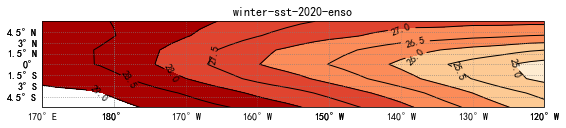

In [10]:
# 二维作图
ax2, fig2 = drawmap()
majorticks = MultipleLocator(10)
# ax2.xaxis.set_major_locator(majorticks)
line = ax2.contour(lone, late, enso_ave, levels=np.arange(24, 31, 0.5), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax2.clabel(line, inline=True, fontsize=10, fmt='%.1f')
ax2.contourf(lone, late, enso_ave, levels=np.arange(24, 30, 1), cmap='OrRd', transform=ccrs.PlateCarree())
ax2.gridlines(draw_labels={"bottom": "x", "left": "y"}, color='gray', alpha=0.5, linestyle=':', 
             auto_inline=False, rotate_labels=False, xlocs=majorticks)
ax2.set_title('winter-sst-2020-enso')
plt.show()

In [11]:
# 168年，年平均一维
enso_yearave = ds.loc[:, 6: -6, 170:240].mean(dim=['lat', 'lon'])
enso_yearave = enso_yearave.groupby(enso_yearave.time.dt.year).mean(dim='time')
enso_yearave

<xarray.DataArray 'sst' (year: 168)>
array([27.243645, 27.7502  , 26.756119, 26.859377, 27.367493, 27.491041,
       26.873251, 26.691916, 26.65828 , 26.945307, 27.118624, 27.141695,
       27.116236, 27.035051, 27.044695, 26.769539, 26.340063, 27.236757,
       26.781487, 26.823637, 26.59266 , 26.892157, 27.102982, 28.46668 ,
       27.710617, 26.69963 , 27.165602, 27.648119, 27.393373, 27.4462  ,
       27.640112, 27.740211, 26.665482, 26.663887, 28.192068, 27.259905,
       26.547806, 27.465248, 26.74382 , 26.475882, 26.642458, 27.352072,
       27.972227, 27.449577, 26.783312, 27.439966, 28.068314, 27.328201,
       28.160593, 27.252121, 27.024687, 28.24398 , 27.159494, 27.14335 ,
       26.775518, 26.41075 , 26.182589, 27.222952, 27.497246, 27.350798,
       28.07501 , 27.481382, 26.270372, 25.76769 , 27.523397, 27.349154,
       27.457306, 26.991392, 26.816416, 27.399782, 26.84794 , 27.198362,
       27.508238, 27.020132, 27.22422 , 27.22906 , 27.915733, 27.506586,
       27.166258, 26.39463 , 26.798874, 27.09022 , 27.119356, 27.155703,
       26.367249, 27.085127, 28.255945, 28.507948, 27.09434 , 26.85138 ,
       27.39322 , 26.991995, 27.13502 , 27.32104 , 27.0469  , 26.802246,
       26.487272, 27.606771, 27.439653, 27.826607, 26.946228, 26.4545  ,
       26.769104, 27.944475, 28.084549, 27.51441 , 27.365076, 27.239946,
       27.103548, 27.766212, 26.917948, 27.914017, 27.826216, 27.229462,
       27.528818, 28.153673, 27.194244, 26.577803, 28.145302, 27.014854,
       26.64853 , 26.480658, 27.311888, 27.917215, 27.465586, 27.746857,
       27.827272, 27.37593 , 28.3536  , 27.908953, 27.16371 , 27.120165,
       27.83132 , 28.579523, 27.046083, 27.047995, 27.97635 , 28.347395,
       28.276228, 28.062555, 28.202555, 27.736246, 27.378252, 28.555153,
       27.5884  , 26.64184 , 26.92021 , 27.521187, 28.311197, 28.060308,
       28.200857, 27.89033 , 27.884245, 27.377996, 26.9717  , 28.036577,
       27.367699, 26.95662 , 27.6172  , 27.573732, 27.995947, 28.97418 ,
       28.165968, 27.692436, 27.915777, 28.336   , 27.615538, 27.186335],
      dtype=float32)
Coordinates:
  * year     (year) int64 1854 1855 1856 1857 1858 ... 2017 2018 2019 2020 2021

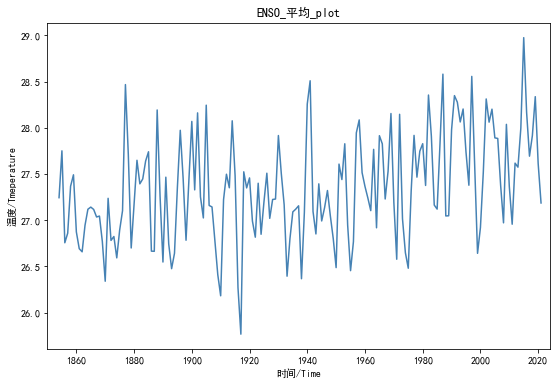

In [22]:
# 一维作图
ax22, fig22 = drawpaper()
ax22.plot(enso_yearave['year'], enso_yearave, color='steelblue')
ax22.set_xlim(1850,2024)
ax22.set_title('ENSO_平均_plot')
plt.show()

## 画图第三部分

In [13]:
# 2020年平均二维，四季
spring = ds.loc[np.datetime64('2020-03-01'):np.datetime64('2021-05-01'), :, :]
summer = ds.loc[np.datetime64('2020-06-01'):np.datetime64('2021-08-01'), :, :]
autumn = ds.loc[np.datetime64('2020-09-01'):np.datetime64('2021-11-01'), :, :]
spring = spring.mean(dim='time')
summer = summer.mean(dim='time')
autumn = autumn.mean(dim='time')
print(spring.max(), spring.min())
print(summer.max(), summer.min())
print(autumn.max(), autumn.min())

<xarray.DataArray 'sst' ()>
array(30.24056625) <xarray.DataArray 'sst' ()>
array(-1.79999971)
<xarray.DataArray 'sst' ()>
array(30.17523575) <xarray.DataArray 'sst' ()>
array(-1.79999971)
<xarray.DataArray 'sst' ()>
array(30.15940475) <xarray.DataArray 'sst' ()>
array(-1.79999971)


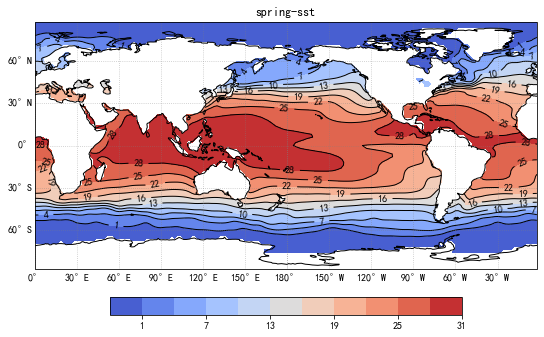

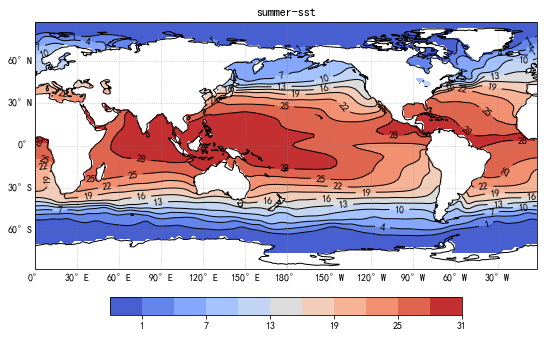

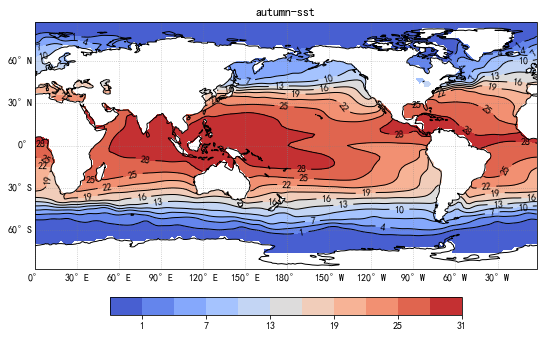

In [14]:
# 二维作图
ax3, fig3 = drawmap()
line = ax3.contour(lonw, latw, spring, levels=np.arange(-2, 33, 3), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax3.clabel(line, inline=True, fontsize=10, fmt='%.0f')
shaded = ax3.contourf(lonw, latw, spring, levels=np.arange(-2, 33, 3), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig3.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax3.set_title('spring-sst')

ax4, fig4 = drawmap()
line = ax4.contour(lonw, latw, summer, levels=np.arange(-2, 33, 3), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax4.clabel(line, inline=True, fontsize=10, fmt='%.0f')
shaded = ax4.contourf(lonw, latw, summer, levels=np.arange(-2, 33, 3), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig4.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax4.set_title('summer-sst')

ax5, fig5 = drawmap()
line = ax5.contour(lonw, latw, autumn, levels=np.arange(-2, 33, 3), colors='k', linewidths=1, transform=ccrs.PlateCarree())
ax5.clabel(line, inline=True, fontsize=10, fmt='%.0f')
shaded = ax5.contourf(lonw, latw, autumn, levels=np.arange(-2, 33, 3), cmap='coolwarm', transform=ccrs.PlateCarree())
cb=fig5.colorbar(shaded, extendrect='True', pad=0.03, fraction=0.1, shrink=0.7, location='bottom', panchor=(0.5, 0.5))
ax5.set_title('autumn-sst')
plt.show()

In [15]:
# 168年四季，一维
enso_season = ds.loc[:, 6: -6, 170:240].mean(dim=['lat', 'lon'])
enso_season = enso_season.groupby(enso_season.time.dt.season).mean(dim='time')
enso_season

<xarray.DataArray 'sst' (season: 4)>
array([27.04157 , 27.499899, 27.700958, 27.147804], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

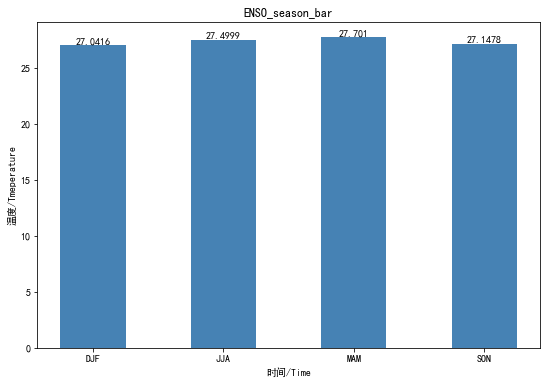

In [16]:
# 一维作图
ax32, fig32 = drawpaper()
bar = ax32.bar(enso_season['season'], enso_season, width=0.5, color='steelblue')
plt.bar_label(bar, label_type='edge')
ax32.set_title('ENSO_season_bar')
plt.show()

## 画图第四部分

In [17]:
# 168年nino3.4区范围平均值
enso_ave = enso_ave.mean(dim=['lat','lon'])
enso_ave

<xarray.DataArray 'sst' ()>
array(27.347557, dtype=float32)

In [18]:
enso_jp = enso_yearave - enso_ave
enso_jp

<xarray.DataArray 'sst' (year: 168)>
array([-1.0391235e-01,  4.0264320e-01, -5.9143829e-01, -4.8818016e-01,
        1.9935608e-02,  1.4348412e-01, -4.7430611e-01, -6.5564156e-01,
       -6.8927765e-01, -4.0225029e-01, -2.2893333e-01, -2.0586205e-01,
       -2.3132133e-01, -3.1250572e-01, -3.0286217e-01, -5.7801819e-01,
       -1.0074940e+00, -1.1079979e-01, -5.6607056e-01, -5.2392006e-01,
       -7.5489616e-01, -4.5540047e-01, -2.4457550e-01,  1.1191235e+00,
        3.6306000e-01, -6.4792633e-01, -1.8195534e-01,  3.0056190e-01,
        4.5816422e-02,  9.8642349e-02,  2.9255486e-01,  3.9265442e-01,
       -6.8207550e-01, -6.8367004e-01,  8.4451103e-01, -8.7652206e-02,
       -7.9975128e-01,  1.1769104e-01, -6.0373688e-01, -8.7167549e-01,
       -7.0509911e-01,  4.5146942e-03,  6.2467003e-01,  1.0202026e-01,
       -5.6424522e-01,  9.2409134e-02,  7.2075653e-01, -1.9355774e-02,
        8.1303596e-01, -9.5436096e-02, -3.2287025e-01,  8.9642334e-01,
       -1.8806267e-01, -2.0420647e-01, -5.7203865e-01, -9.3680763e-01,
       -1.1649685e+00, -1.2460518e-01,  1.4968872e-01,  3.2405853e-03,
        7.2745323e-01,  1.3382530e-01, -1.0771847e+00, -1.5798664e+00,
        1.7584038e-01,  1.5964508e-03,  1.0974884e-01, -3.5616493e-01,
       -5.3114128e-01,  5.2225113e-02, -4.9961662e-01, -1.4919472e-01,
        1.6068077e-01, -3.2742500e-01, -1.2333679e-01, -1.1849785e-01,
        5.6817627e-01,  1.5902901e-01, -1.8129921e-01, -9.5292664e-01,
...
       -2.1253777e-01, -2.6517868e-02, -3.0065727e-01, -5.4531097e-01,
       -8.6028481e-01,  2.5921440e-01,  9.2096329e-02,  4.7904968e-01,
       -4.0132904e-01, -8.9305687e-01, -5.7845306e-01,  5.9691811e-01,
        7.3699188e-01,  1.6685295e-01,  1.7518997e-02, -1.0761070e-01,
       -2.4400902e-01,  4.1865540e-01, -4.2960930e-01,  5.6645966e-01,
        4.7865868e-01, -1.1809540e-01,  1.8126106e-01,  8.0611610e-01,
       -1.5331268e-01, -7.6975441e-01,  7.9774475e-01, -3.3270264e-01,
       -6.9902802e-01, -8.6689949e-01, -3.5669327e-02,  5.6965828e-01,
        1.1802864e-01,  3.9929962e-01,  4.7971535e-01,  2.8373718e-02,
        1.0060425e+00,  5.6139565e-01, -1.8384743e-01, -2.2739220e-01,
        4.8376274e-01,  1.2319660e+00, -3.0147362e-01, -2.9956245e-01,
        6.2879372e-01,  9.9983788e-01,  9.2867088e-01,  7.1499825e-01,
        8.5499763e-01,  3.8868904e-01,  3.0694962e-02,  1.2075958e+00,
        2.4084282e-01, -7.0571709e-01, -4.2734718e-01,  1.7362976e-01,
        9.6364021e-01,  7.1275139e-01,  8.5330009e-01,  5.4277229e-01,
        5.3668785e-01,  3.0439377e-02, -3.7585640e-01,  6.8902016e-01,
        2.0141602e-02, -3.9093781e-01,  2.6964378e-01,  2.2617531e-01,
        6.4838982e-01,  1.6266232e+00,  8.1841087e-01,  3.4487915e-01,
        5.6822014e-01,  9.8844337e-01,  2.6798058e-01, -1.6122246e-01],
      dtype=float32)
Coordinates:
  * year     (year) int64 1854 1855 1856 1857 1858 ... 2017 2018 2019 2020 2021

In [19]:
ElNino = []
LaNina = []
for i in enso_jp['year']:
    if enso_jp.loc[i]>=0.5:
        ElNino.append(int(i.data))
    if enso_jp.loc[i]<=-0.5:
        LaNina.append(int(i.data))

In [20]:
print(ElNino, LaNina)

[1877, 1888, 1896, 1900, 1902, 1905, 1914, 1930, 1940, 1941, 1957, 1958, 1965, 1969, 1972, 1977, 1982, 1983, 1987, 1990, 1991, 1992, 1993, 1994, 1997, 2002, 2003, 2004, 2005, 2006, 2009, 2014, 2015, 2016, 2018, 2019] [1856, 1861, 1862, 1869, 1870, 1872, 1873, 1874, 1879, 1886, 1887, 1890, 1892, 1893, 1894, 1898, 1908, 1909, 1910, 1916, 1917, 1922, 1933, 1934, 1938, 1949, 1950, 1955, 1956, 1971, 1974, 1975, 1999]


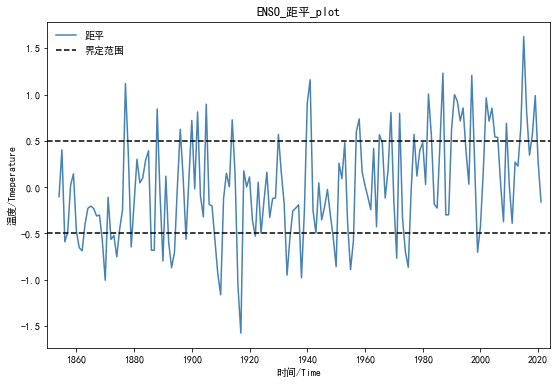

In [21]:
ax42, fig42 = drawpaper()
ax42.plot(enso_jp['year'], enso_jp, color='steelblue', label='距平')
ax42.axhline(y=0.5,color='k',linestyle="--", label='界定范围')
ax42.axhline(y=-0.5,color='k',linestyle="--")
ax42.legend(loc='upper left', frameon=False)
ax42.set_xlim(1850,2024)
ax42.set_title('ENSO_距平_plot')
plt.show()